# Project Title: How long does it take for funding activity to recover after 2008 financial crisis(late 2007 - mid 2009).

## Main dataset: Startup investments


# Introduction 
This research aims in analyze the impact of major economic events(currently thinking of 2008 financial crisis period)on startup funding activity and determine how long it takes for different industries to recover to pre-event funding levels, and analyze why some specific industries might recover faster and some recover slower

In [373]:
pip install -q nbconvert


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [374]:
pip install -q pyppeteer


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [375]:
pip install -q qeds


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [376]:
import pandas as pd
import numpy as np

from IPython.display import display

# Import and clean the data

In [377]:
funds = pd.read_csv("/Users/zzybollar/Downloads/archive/funds.csv")
funding_rounds = pd.read_csv("/Users/zzybollar/Downloads/archive/funding_rounds.csv")
funding_rounds = funding_rounds.dropna()
funds = funds.merge(funding_rounds[['id', 'raised_amount_usd']], on='id', how='left')
funds = funds.drop(columns=['source_url','source_description','created_at','updated_at'])
funds


,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code,raised_amount_usd
0,1,1,f:371,Second Fund,2008-12-16,300000000.0,USD,NaN
1,4,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,200750000.0,USD,27500000.0
2,5,5,f:951,Tenth fund,2008-08-11,650000000.0,USD,NaN
3,6,6,f:192,New funds acquire,NaN,625000000.0,USD,NaN
4,7,7,f:519,Third fund,2008-05-20,200000000.0,USD,10000000.0
...,...,...,...,...,...,...,...,...
1559,1697,1697,f:101,Fund V,2013-12-11,150000000.0,USD,6100000.0
1560,1698,1698,f:7331,JANVEST Technologies LP I,2013-03-19,5.0,USD,NaN
1561,1699,1699,f:7791,Fund II,2013-12-11,5000000.0,USD,NaN
1562,1700,1700,f:15091,Fund I,2013-12-11,1100000.0,USD,NaN


In [378]:
offices = pd.read_csv("/Users/zzybollar/Downloads/archive/offices.csv")
offices_cleaned = offices.dropna(subset=['city', 'region', 'zip_code','state_code'])

# Merge the data

In [379]:
investments = pd.read_csv("/Users/zzybollar/Downloads/archive/investments.csv")
investments = investments.dropna()
investments = investments.dropna(subset=['id', 'investor_object_id'])
investments = investments.drop(columns=['created_at', 'updated_at'])

investments['funded_object_id'] = investments['funded_object_id'].astype(str)
funds['id'] = funds['id'].astype(str)

investments = investments.merge(funds[['id', 'name']], left_on='funded_object_id', right_on='id', how='left')
investments = investments.drop(columns=['id_y', 'name'])
investments = investments.rename(columns={'id_x': 'id'})
investments = investments.drop_duplicates()
investments


,id,funding_round_id,funded_object_id,investor_object_id
0,1,1,c:4,f:1
1,2,1,c:4,f:2
2,3,3,c:5,f:4
3,4,4,c:5,f:1
4,5,4,c:5,f:5
...,...,...,...,...
80897,80898,57882,c:285244,p:267312
80898,80899,57912,c:60389,p:268570
80899,80900,57929,c:286183,p:365
80900,80901,57929,c:286183,p:176466


In [380]:
funds['id'] = funds['id'].astype(str)
investments['funding_round_id'] = investments['funding_round_id'].astype(str)

merged_data = pd.merge(funds, investments, left_on='id', right_on='funding_round_id', how='inner')
merged_data = merged_data.drop(columns=['id_y', 'funding_round_id'])
merged_data = merged_data.sort_values(by='funded_at', ascending=True)
merged_data = merged_data.rename(columns={'id_x': 'id'})
merged_data.dropna()


,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code,raised_amount_usd,funded_object_id,investor_object_id
1075,586,586,f:30,Mangrove I,2000-01-01,51.0,EUR,1900000.0,c:763,f:32
797,413,413,f:1656,Atlantic Bridge I,2004-08-24,98500000.0,EUR,17500000.0,c:531,f:271
796,413,413,f:1656,Atlantic Bridge I,2004-08-24,98500000.0,EUR,17500000.0,c:531,f:248
795,413,413,f:1656,Atlantic Bridge I,2004-08-24,98500000.0,EUR,17500000.0,c:531,f:18
1068,583,583,f:2130,Poste Innovation 10,2005-01-01,16000000.0,EUR,15000000.0,c:757,f:17
...,...,...,...,...,...,...,...,...,...,...
2985,1648,1648,f:7364,Atlas Capital Resources II LP,2013-11-22,900000000.0,USD,15000000.0,c:113,f:262
3037,1681,1681,f:48,Benchmark Capital Partners VIII LP,2013-12-06,425000000.0,USD,0.0,c:2507,f:3181
3038,1681,1681,f:48,Benchmark Capital Partners VIII LP,2013-12-06,425000000.0,USD,0.0,c:2507,f:1497
3059,1697,1697,f:101,Fund V,2013-12-11,150000000.0,USD,6100000.0,c:38,f:519


# Split the data by the 2008 financial crisis event

In [381]:
merged_data['funded_at'] = pd.to_datetime(merged_data['funded_at'])

In [382]:
before_crisis_end = "2007-09-30"
during_crisis_start = "2007-10-01"
during_crisis_end = "2009-06-30"
after_crisis_start = "2009-07-01"

In [383]:
funding_before_crisis = merged_data[(merged_data['funded_at'] >= "2006-01-01") & (merged_data['funded_at'] <= before_crisis_end)]
funding_during_crisis = merged_data[(merged_data['funded_at'] >= during_crisis_start) & (merged_data['funded_at'] <= during_crisis_end)]
funding_after_crisis = merged_data[(merged_data['funded_at'] >= after_crisis_start) & (merged_data['funded_at'] <= "2010-12-31")]

In [384]:
funding_before_crisis.drop(columns=['raised_amount_usd']) 

,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code,funded_object_id,investor_object_id
277,129,129,f:1407,Conor Technology Fund I Ky,2006-01-01,30000000.0,USD,c:153,f:102
276,129,129,f:1407,Conor Technology Fund I Ky,2006-01-01,30000000.0,USD,c:153,f:48
2311,1281,1281,f:269,Fund IV,2006-01-01,300000000.0,USD,c:1745,f:717
3026,1667,1667,f:562,Sierra Ventures IX,2006-01-01,400000000.0,USD,c:2750,c:2520
280,129,129,f:1407,Conor Technology Fund I Ky,2006-01-01,30000000.0,USD,c:153,f:1080
...,...,...,...,...,...,...,...,...,...
37,19,19,f:166,venture fund,2007-09-20,365000000.0,USD,c:23,p:3789
36,19,19,f:166,venture fund,2007-09-20,365000000.0,USD,c:23,f:18
35,19,19,f:166,venture fund,2007-09-20,365000000.0,USD,c:23,f:17
34,18,18,f:745,"Foundry Venture Capital 2007, L.P.",2007-09-20,225000000.0,USD,c:22,f:16


In [385]:
funding_during_crisis.drop(columns=['raised_amount_usd']) 

,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code,funded_object_id,investor_object_id
224,105,105,f:62,Ignition Ventures IV,2007-10-01,400000000.0,USD,c:126,f:87
1985,1111,1111,f:4689,DFJ Growth Fund 2006,2007-10-01,290000000.0,USD,c:46,f:610
227,105,105,f:62,Ignition Ventures IV,2007-10-01,400000000.0,USD,c:126,f:73
225,105,105,f:62,Ignition Ventures IV,2007-10-01,400000000.0,USD,c:126,f:86
226,105,105,f:62,Ignition Ventures IV,2007-10-01,400000000.0,USD,c:126,f:88
...,...,...,...,...,...,...,...,...,...
239,111,111,f:3824,Solamere Founders Fund I,2009-06-02,186000000.0,USD,c:128,f:91
238,111,111,f:3824,Solamere Founders Fund I,2009-06-02,186000000.0,USD,c:128,f:92
237,111,111,f:3824,Solamere Founders Fund I,2009-06-02,186000000.0,USD,c:128,f:93
236,111,111,f:3824,Solamere Founders Fund I,2009-06-02,186000000.0,USD,c:128,f:89


In [386]:
funding_after_crisis.drop(columns=['raised_amount_usd'])
funding_after_crisis['raised_currency_code'].unique()

array(['USD', 'EUR', 'GBP', 'CAD', 'JPY'], dtype=object)

# Visualize the data

In [387]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import qeds
import seaborn as sns


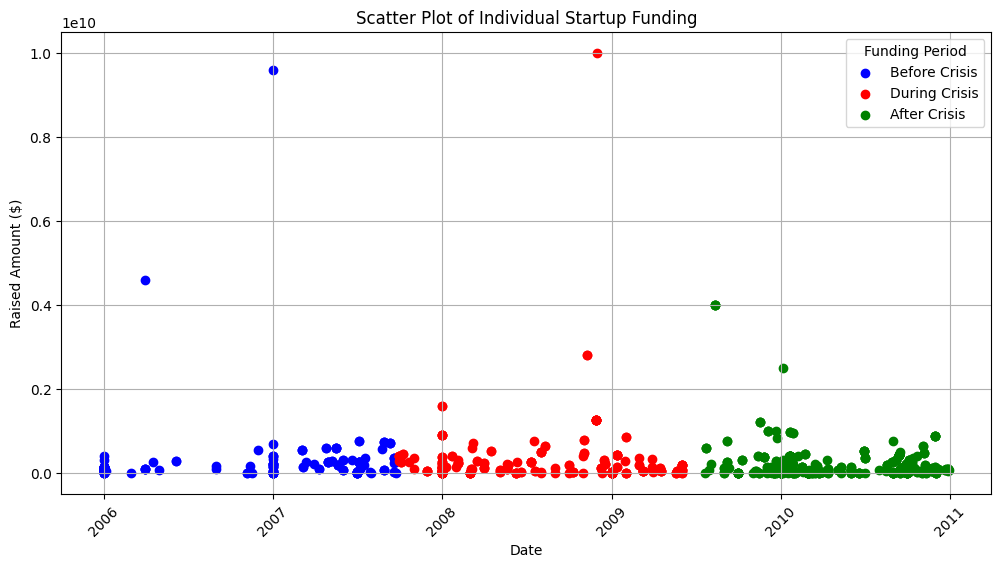

In [388]:
plt.figure(figsize=(12, 6))

plt.scatter(funding_before_crisis["funded_at"], funding_before_crisis["raised_amount"], label="Before Crisis", color="blue", alpha=1)
plt.scatter(funding_during_crisis["funded_at"], funding_during_crisis["raised_amount"], label="During Crisis", color="red", alpha=1)
plt.scatter(funding_after_crisis["funded_at"], funding_after_crisis["raised_amount"], label="After Crisis", color="green", alpha=1)

plt.title("Scatter Plot of Individual Startup Funding")
plt.xlabel("Date")
plt.ylabel("Raised Amount ($)")
plt.legend(title="Funding Period")
plt.xticks(rotation=45)
plt.grid(True)

In [389]:
for df in [funding_before_crisis, funding_during_crisis, funding_after_crisis]:
    df["raised_amount_log"] = np.log1p(df["raised_amount"])
    
funding_before_crisis["Period"] = "Before Crisis"
funding_during_crisis["Period"] = "During Crisis"
funding_after_crisis["Period"] = "After Crisis"

/var/folders/lh/v36j2zlj0t9_xqpxcj3l9qfw0000gn/T/ipykernel_9161/2705701141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["raised_amount_log"] = np.log1p(df["raised_amount"])
/var/folders/lh/v36j2zlj0t9_xqpxcj3l9qfw0000gn/T/ipykernel_9161/2705701141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["raised_amount_log"] = np.log1p(df["raised_amount"])
/var/folders/lh/v36j2zlj0t9_xqpxcj3l9qfw0000gn/T/ipykernel_9161/2705701141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [390]:
funding_data = pd.concat([funding_before_crisis, funding_during_crisis, funding_after_crisis])
raised_amount_log = np.log(funding_data["raised_amount"])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


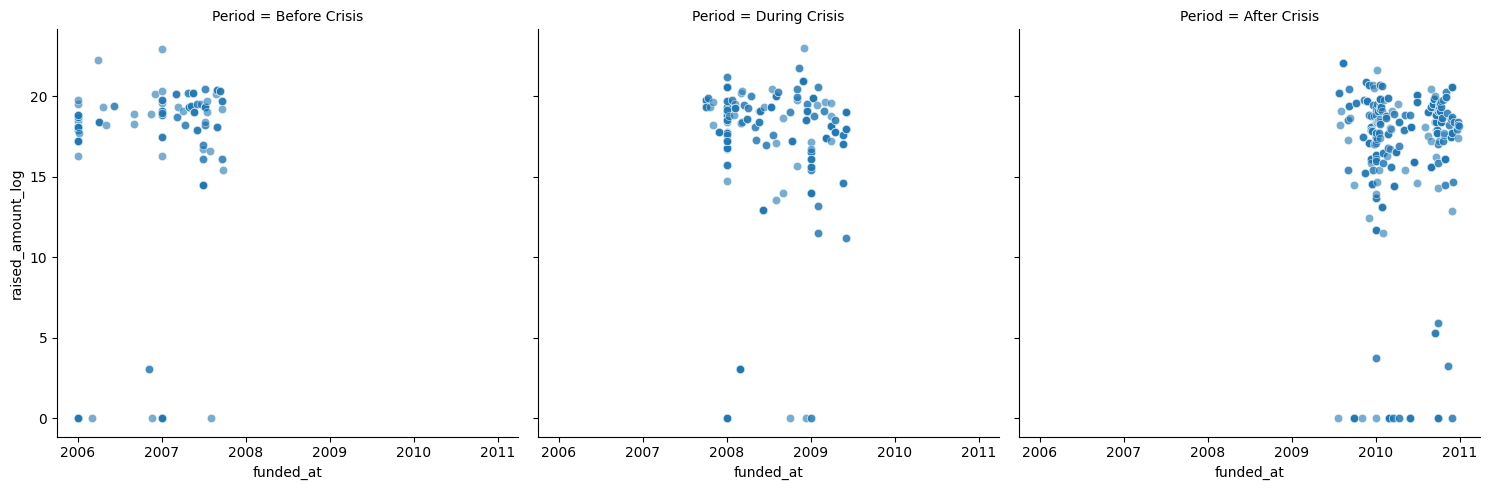

In [391]:
g = sns.FacetGrid(funding_data, col="Period", col_wrap=3, height=5, sharex=True, sharey=True)
g.map_dataframe(sns.scatterplot, x="funded_at", y="raised_amount_log", alpha=0.6)

In [392]:
total_before_crisis = funding_before_crisis['raised_amount_usd'].sum()
total_during_crisis = funding_during_crisis['raised_amount_usd'].sum()
total_after_crisis = funding_after_crisis['raised_amount_usd'].sum()

In [393]:
funding_totals = pd.DataFrame({
    'Period': ['Before Crisis', 'During Crisis', 'After Crisis'],
    'Total Raised Amount (USD)': [total_before_crisis, total_during_crisis, total_after_crisis]
})

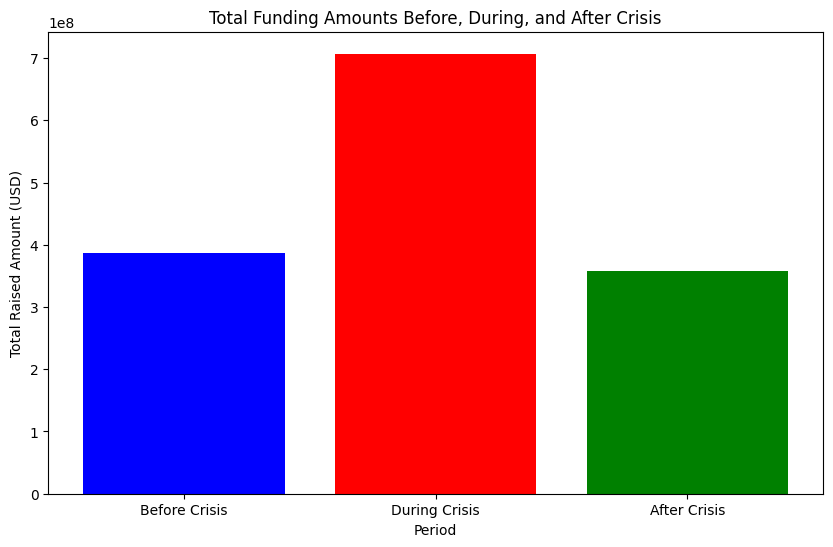

In [394]:
plt.figure(figsize=(10, 6))
plt.bar(funding_totals['Period'], funding_totals['Total Raised Amount (USD)'], color=['blue', 'red', 'green'])
plt.title('Total Funding Amounts Before, During, and After Crisis')
plt.xlabel('Period')
plt.ylabel('Total Raised Amount (USD)')
plt.show()